In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import numpy as np
import random
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from helpers import (
    flatten, 
    get_theoretical_kappa, 
    noise_level, 
    signed_layout,
    get_borderless_fig, 
    draw_nodes,
    draw_edges
)
from exp_helpers import run_pipeline
from data_helpers import make_polarized_graphs_fewer_parameters
from tqdm import tqdm

In [3]:
random.seed(12345)
np.random.seed(12345)

In [4]:
sns.set(style="whitegrid")
plt.style.use('paper')

In [127]:
styles = dict(
    palette=sns.cubehelix_palette(3, light=0.8, start=0.5, rot=-.75),
    style='kappa_in_math',
    markers=True,

)

In [166]:
plt.rcParams['figure.figsize'] = (6, 4)

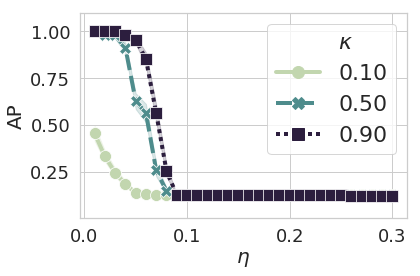

In [167]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
perf_df = perf_df[(
    np.isclose(perf_df['kappa'], 0.1)) 
    | (np.isclose(perf_df['kappa'], 0.5)) 
    | (np.isclose(perf_df['kappa'], 0.9))
#    | (np.isclose(perf_df['kappa'], 0.95))
]
perf_df['kappa_in_math'] = perf_df['kappa'].apply(lambda v: "${:.2f}$".format(v))


fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='eta', y='MAP', hue='kappa_in_math', data=perf_df, ax=ax, 
    err_style='band',
    **styles
)

lp.set(
    ylim=(0, 1.1),
    xticks=[0.0, 0.1, 0.2, 0.3],
    yticks=[0.25, 0.5, 0.75, 1.0],
    xlabel=r'$\eta$',
    ylabel='AP',
    
)
l = lp.legend()
lp.axes.get_legend().texts[0].set_text(r'$\kappa$')

fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_eta_ap.pdf')

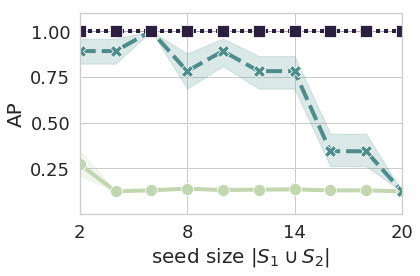

In [168]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
perf_df = perf_df[(
    np.isclose(perf_df['kappa'], 0.1)) 
    | (np.isclose(perf_df['kappa'], 0.5)) 
    | (np.isclose(perf_df['kappa'], 0.9))
#    | (np.isclose(perf_df['kappa'], 0.95))
]
perf_df['kappa_in_math'] = perf_df['kappa'].apply(lambda v: "${:.2f}$".format(v))
perf_df['seed_size'] *= 2

fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='seed_size', y='MAP', hue='kappa_in_math', data=perf_df, ax=ax,
    legend=False, 
    err_style='band',
    **styles
)
lp.set(
    xlim=(2, 20),
    ylim=(0, 1.1),
    xticks=[2, 8, 14, 20],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel='AP',
    xlabel='seed size $|S_1 \cup S_2|$')
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_seed_ap.pdf')

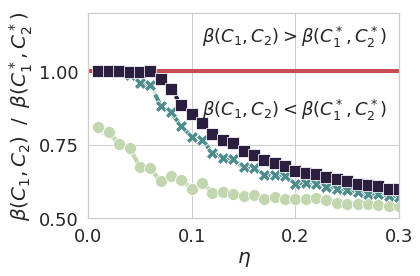

In [169]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
perf_df = perf_df[(
    np.isclose(perf_df['kappa'], 0.1)) 
    | (np.isclose(perf_df['kappa'], 0.5)) 
    | (np.isclose(perf_df['kappa'], 0.9))
#    | (np.isclose(perf_df['kappa'], 0.95))
]
perf_df['kappa_in_math'] = perf_df['kappa'].apply(lambda v: "${:.2f}$".format(v))
perf_df['beta_ratio'] = perf_df['min_beta'] / perf_df['ground_truth_beta']


fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='eta', y='beta_ratio', hue='kappa_in_math', data=perf_df, ax=ax, 
    legend=False,
    err_style='band',
    **styles
)

lp.set(
    ylim=(0.5, 1.2),
    xlim=(0, 0.3),
    xticks=[0.0, 0.1, 0.2, 0.3],
    yticks=[0.25, 0.5, 0.75, 1.0],
    xlabel=r'$\eta$',
    ylabel=r'$\beta(C_1, C_2)\;\; / \;\;\beta(C_1^*, C_2^*)$',
    
)
ax.text(0.11, 1.1, r'$\beta(C_1, C_2) > \beta(C_1^*, C_2^*)$', fontsize=18)
ax.text(0.11, 0.85, r'$\beta(C_1, C_2) < \beta(C_1^*, C_2^*)$', fontsize=18)
ax.hlines(1, 0, 0.3, colors='r')
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_eta_beta_ratio.pdf')

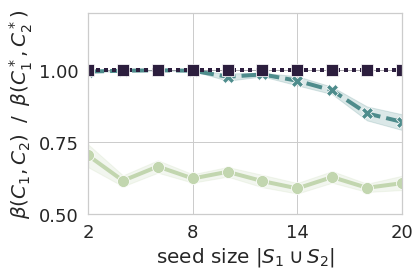

In [170]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
perf_df = perf_df[(
    np.isclose(perf_df['kappa'], 0.1)) 
    | (np.isclose(perf_df['kappa'], 0.5)) 
    | (np.isclose(perf_df['kappa'], 0.9))
#    | (np.isclose(perf_df['kappa'], 0.95))
]
perf_df['kappa_in_math'] = perf_df['kappa'].apply(lambda v: "${:.2f}$".format(v))
perf_df['beta_ratio'] = perf_df['min_beta'] / perf_df['ground_truth_beta']
perf_df['seed_size'] *= 2


fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='seed_size', y='beta_ratio', hue='kappa_in_math', data=perf_df, ax=ax,
    legend=False,
    err_style='band',
    **styles
)
lp.set(
    xlim=(2, 20),
    ylim=(0.5, 1.2),
    xticks=[2, 8, 14, 20],    
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel=r'$\beta(C_1, C_2)\;\; / \;\;\beta(C_1^*, C_2^*)$',
    xlabel='seed size $|S_1 \cup S_2|$'
)
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_seed_beta_ratio.pdf')


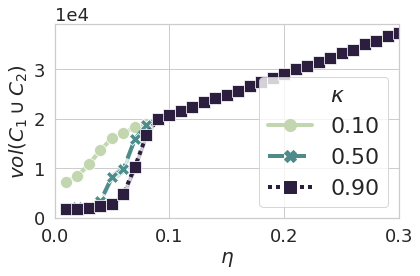

In [171]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
perf_df = perf_df[(
    np.isclose(perf_df['kappa'], 0.1)) 
    | (np.isclose(perf_df['kappa'], 0.5)) 
    | (np.isclose(perf_df['kappa'], 0.9))
#    | (np.isclose(perf_df['kappa'], 0.99))
]
perf_df['kappa_in_math'] = perf_df['kappa'].apply(lambda v: "${:.2f}$".format(v))
perf_df['solution_size'] = (perf_df['C1_vol'] + perf_df['C2_vol'])

fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='eta', y='solution_size', hue='kappa_in_math', data=perf_df, ax=ax, 
    err_style='band',
    legend='full',
    **styles
)

lp.set(
    #  ylim=(0.5, 1.2),
    xlim=(0, 0.3),
    xticks=[0.0, 0.1, 0.2, 0.3],
    # yticks=[0.25, 0.5, 0.75, 1.0],
    xlabel=r'$\eta$',
    ylabel=r'$vol(C_1 \cup C_2)$',
    
)
# lp.legend().set_title(r'$\kappa$')
ax.ticklabel_format(style='scientific', axis='y', scilimits=(2, 3))
# ax.hlines(40, 0, 0.3, colors='red')
ax.legend(loc='bottom right')
lp.axes.get_legend().texts[0].set_text(r'$\kappa$')
# lp.axes.get_legend()

fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_eta_solution_size.pdf')

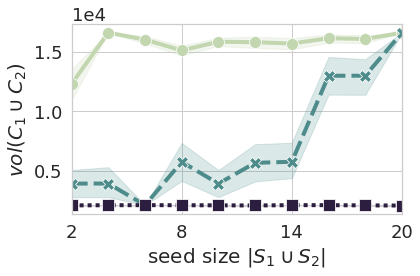

In [172]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
perf_df = perf_df[(
    np.isclose(perf_df['kappa'], 0.1)) 
    | (np.isclose(perf_df['kappa'], 0.5)) 
    | (np.isclose(perf_df['kappa'], 0.9))
#    | (np.isclose(perf_df['kappa'], 0.99))
]
perf_df['kappa_in_math'] = perf_df['kappa'].apply(lambda v: "${:.2f}$".format(v))
perf_df['solution_size'] = (perf_df['C1_vol'] + perf_df['C2_vol'])
perf_df['seed_size'] *= 2

fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='seed_size', y='solution_size', hue='kappa_in_math', data=perf_df, ax=ax,
    err_style='band',
    legend=False,
    **styles
)
lp.set(
    xlim=(2, 20),
    xticks=[2, 8, 14, 20],
    ylabel=r'$vol(C_1 \cup C_2)$',
    xlabel='seed size $|S_1 \cup S_2|$'
)
ax.ticklabel_format(style='scientific', axis='y', scilimits=(2, 3))
fig.tight_layout()
# ax.hlines(40, 1, 10, colors='red')
fig.savefig('figs/synthetic_experiment/effect_of_seed_solution_size.pdf')
